<a href="https://colab.research.google.com/github/abhi14062000/hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objs as go

#1 - reading dataset 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/EDA/Hotel Bookings.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#2 Check basic database information.

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.shape

(119390, 32)

## 3 Find the missing value, show the total null values for each column and sort it in descending order



In [ ]:
data.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

We have 4 features with missing values.

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.



In [ ]:
data[['agent','company']] = data[['agent','company']].fillna(0.0)

Children column contains the count of children, so we will replace all the missing values with the rounded mean value.

And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.


In [ ]:
## For the missing values in the country column, replace it with mode (value that appears most often)
data['country'].fillna(data.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
data['children'].fillna(round(data.children.mean()), inplace=True)

There are many rows that have zero guests including adults, children and babies. These type of rows does not make

In [ ]:
data[(data.adults + data.children + data.babies )==0 ].shape

(180, 32)

so now , We have 180 such rows. we will just remove these rows.



In [ ]:
## Drop Rows where there is no adult, baby and child
data = data.drop(data[(data.adults+data.babies+data.children)==0].index)

# 4 - checking datatypes

In [ ]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

so now here we can see no of childrens,agent,& company are in floats . but its in simple integer so now we are gonna convert float into integer

In [ ]:
## convert datatype of these columns from float to integer
data[['children', 'company', 'agent']] = data[['children', 'company', 'agent']].astype('int64')

#*5* unique values

In [ ]:
data['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
data['is_canceled'].value_counts()



0    75011
1    44199
Name: is_canceled, dtype: int64

In [ ]:
data['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [ ]:
data['country'].value_counts(normalize=True)


PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 177, dtype: float64

# 6 How Many Booking Were Cancelled?

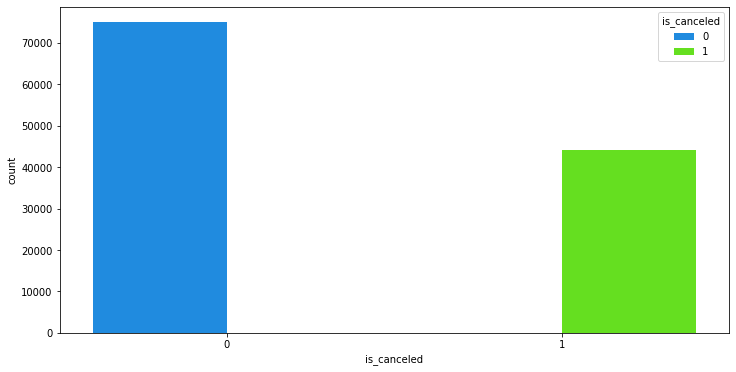

In [ ]:
not_cancelled = data[data['is_canceled'] ==0]
cancelled = data[data['is_canceled'] !=0]
plt.figure(figsize=(12,6))
sns.countplot(x = 'is_canceled', data = data , hue = 'is_canceled', palette= 'gist_rainbow_r')


Bookings got canceled 37% of the time. While booking guest did checkd-in (did not cancel the booking ) almost 63% of the time.

#7  What is the booking ratio between Resort Hotel and City Hotel?

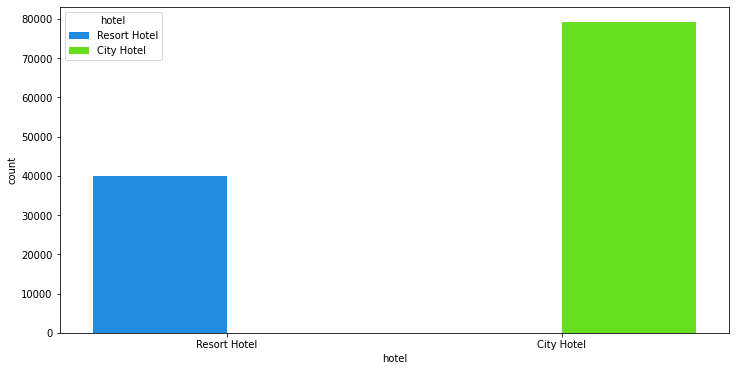

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'hotel', data = data , hue = 'hotel', palette= 'gist_rainbow_r')

from graph we can see that more than 60% peoples prefer city hotels

#8 reservation status

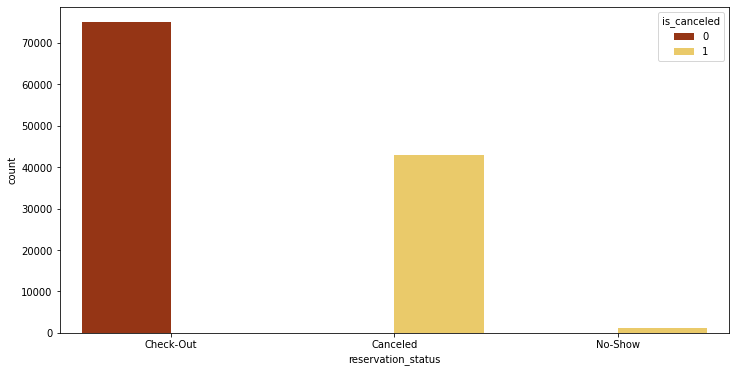

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='reservation_status', data = data, hue = 'is_canceled', palette= 'afmhot')

#9 comparison of date year & month

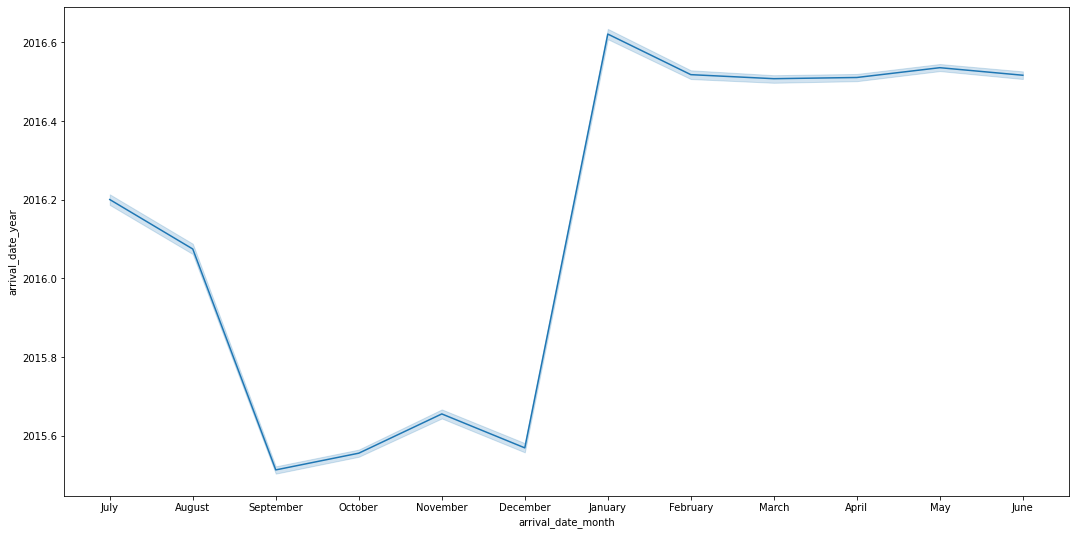

In [ ]:
plt.figure(figsize=(18,9))
sns.lineplot(data=data,x='arrival_date_month',y='arrival_date_year')

As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.

#10 comparison between stays in weekend nights and week nights

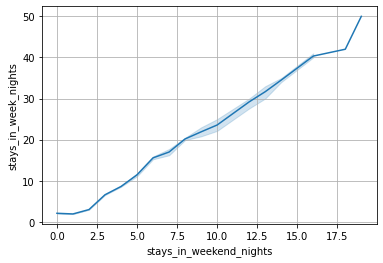

In [ ]:
sns.lineplot(data=data, x ="stays_in_weekend_nights", y ="stays_in_week_nights")
plt.grid()
plt.show()

so here we can see that stays in week nights is more than weekend nights